In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as StandardScaler
import sklearn.decomposition as PCA

Değişkenler ile bileşenler(components) arasındaki doğrusal ilişkiyi açıklamak için bioplot kullanılır.

# Soru 1:
In this assignment, you will continue to study the data of the US Education System (dataset). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

Create a variable that contains the weighted average of the grades in the dataset. The number of students in the fourth grade is different from that of the eighth grade. So you will need a weighted average!

In [15]:
df=pd.read_csv("states_all.csv")

df_sorted=df.sort_values("STATE")
df_sorted.fillna(df_sorted.groupby(["STATE"]).transform('mean'), inplace=True)


df_sorted["Weighted_4"]=(df_sorted["GRADES_4_G"]*(df_sorted["AVG_MATH_4_SCORE"]+df_sorted["AVG_READING_4_SCORE"]))/df_sorted["GRADES_4_G"]
df_sorted["Weighted_8"]=(df_sorted["GRADES_8_G"]*(df_sorted["AVG_MATH_8_SCORE"]+df_sorted["AVG_READING_8_SCORE"]))/df_sorted["GRADES_8_G"]
df_sorted["Weighted_4_8"]=(df_sorted["Weighted_4"]+df_sorted["Weighted_8"])/2
df_sorted.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,Weighted_4,Weighted_8,Weighted_4_8
0,1992_ALABAMA,ALABAMA,1992,736584.333333,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,464653.65,213399.333333,731634.0,208.000000,252.000000,207.000000,255.0,415.000000,507.000000,461.00000
918,2010_ALABAMA,ALABAMA,2010,748889.000000,7281058.0,1134111.0,3800128.0,2346819.0,7647571.0,3900492.0,...,467768.00,221940.000000,755552.0,226.090909,264.166667,212.615385,255.0,438.706294,519.166667,478.93648
969,2011_ALABAMA,ALABAMA,2011,746933.000000,7376725.0,1077070.0,3965614.0,2334041.0,7411768.0,3844055.0,...,461122.00,217615.000000,744621.0,231.000000,269.000000,220.000000,258.0,451.000000,527.000000,489.00000
357,1999_ALABAMA,ALABAMA,1999,737639.000000,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,...,472019.00,202045.000000,740732.0,226.090909,264.166667,212.615385,255.0,438.706294,519.166667,478.93648
1020,2012_ALABAMA,ALABAMA,2012,744621.000000,7136949.0,789954.0,3948651.0,2398344.0,7222161.0,3695221.0,...,458974.00,217203.000000,744637.0,226.090909,264.166667,212.615385,255.0,438.706294,519.166667,478.93648


# Soru 2:
What is the correlation between the variable you just created and the types of expenditures? Which expenditure item has more correlation than others?

In [16]:
print("Relation between weighted_4_8 and TOTAL_EXPENDITURE:        ",
      df_sorted["Weighted_4_8"].corr(df_sorted["TOTAL_EXPENDITURE"]))
print("Relation between weighted_4_8 and INSTRUCTION_EXPENDITURE:   ",
      df_sorted["Weighted_4_8"].corr(df_sorted["INSTRUCTION_EXPENDITURE"]))
print("Relation between weighted_4_8 and SUPPORT_SERVICES_EXPENDITURE:  ",
      df_sorted["Weighted_4_8"].corr(df_sorted["SUPPORT_SERVICES_EXPENDITURE"]))
print("Relation between weighted_4_8 and OTHER_EXPENDITURE:         ",
      df_sorted["Weighted_4_8"].corr(df_sorted["OTHER_EXPENDITURE"]))



Relation between weighted_4_8 and TOTAL_EXPENDITURE:         0.012362081546012297
Relation between weighted_4_8 and INSTRUCTION_EXPENDITURE:    0.02373519269366893
Relation between weighted_4_8 and SUPPORT_SERVICES_EXPENDITURE:   0.014871370252169763
Relation between weighted_4_8 and OTHER_EXPENDITURE:          -0.07367818688309691


In [4]:
# Farklı bir yazım şekliyle gösterim:

x=df_sorted.loc[:,["Weighted_4_8","TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE"]]
x.corr()

# Korelasyon tablosundan da anlaşıldığı gibi toplam harcamalar üzerinde en büyük etki destek hizmetleri harcamasıdır yani;
# TOTAL_EXPENDITURE ile SUPPORT_SERVICES_EXPENDITURE arasında çok yüksek ilişki vardır

,Weighted_4_8,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE
Weighted_4_8,1.000000,0.012362,0.023735,0.014871,-0.073678
TOTAL_EXPENDITURE,0.012362,1.000000,0.991684,0.993535,0.941237
INSTRUCTION_EXPENDITURE,0.023735,0.991684,1.000000,0.977400,0.905614
SUPPORT_SERVICES_EXPENDITURE,0.014871,0.993535,0.977400,1.000000,0.948480
OTHER_EXPENDITURE,-0.073678,0.941237,0.905614,0.948480,1.000000


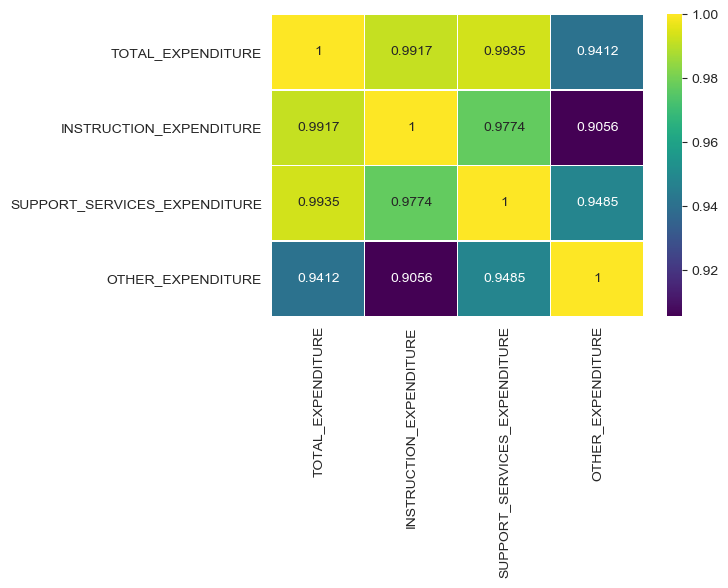

In [44]:
# TOTAL_EXPENDITURE
# INSTRUCTION_EXPENDITURE
# SUPPORT_SERVICES_EXPENDITURE
# OTHER_EXPENDITURE

# PCA için array e dönüştürülmeli
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

df1=df_sorted.loc[:,["TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE"]]
df1_corr=df1.corr()
df1_corr.reset_index()

# Korelasyon tablosuna göre, toplam harcamalar üzerinde en çok etkiye sahip olan 
# destek hizmetleri harcamaları olmuştur. İlişkiyi görselleştirmek için heatmap()kullanalım:
plt.figure(figsize=(6,4),dpi=100)
sns.heatmap(df1_corr, annot=True, linewidths=0.4, fmt='.4g', cmap='viridis');

x=StandardScaler().fit_transform(df1)
pca=PCA(n_components=16)

# Soru 3:
Now apply the Principal Components Analysis (PCA) for the four expenditure items! How much of the total variance can be explained by the first component?

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:

df1=df_sorted.loc[:,["TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE"]]

df1.dropna(inplace=True) # kayıp değerler varken çalışmamaktadır

df1_new=StandardScaler().fit_transform(df1)
pca=PCA(n_components=4)
principalcomponents=pca.fit_transform(df1_new)


In [19]:
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

print(exp_var,"\n")
print(cumsum_var)

# Toplam varyansın yaklaşık %97 si ilk komponent tarafından açıklanabilir.

[9.69922684e-01 2.60685655e-02 3.56632384e-03 4.42426929e-04] 

[ 96.99  99.6   99.96 100.  ]


# Soru 4:
What is the correlation between the GPA you created and the first principal component?

In [21]:
print(df_sorted.columns,"\n")
print(df1.columns)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE', 'Weighted_4',
       'Weighted_8', 'Weighted_4_8'],
      dtype='object') 

Index(['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE'],
      dtype='object')


In [24]:
df_sorted[["Weighted_4_8","SUPPORT_SERVICES_EXPENDITURE","TOTAL_EXPENDITURE","INSTRUCTION_EXPENDITURE",
          "OTHER_EXPENDITURE"]].corr()

,Weighted_4_8,SUPPORT_SERVICES_EXPENDITURE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,OTHER_EXPENDITURE
Weighted_4_8,1.000000,0.014871,0.012362,0.023735,-0.073678
SUPPORT_SERVICES_EXPENDITURE,0.014871,1.000000,0.993535,0.977400,0.948480
TOTAL_EXPENDITURE,0.012362,0.993535,1.000000,0.991684,0.941237
INSTRUCTION_EXPENDITURE,0.023735,0.977400,0.991684,1.000000,0.905614
OTHER_EXPENDITURE,-0.073678,0.948480,0.941237,0.905614,1.000000


# Soru 5:
When you need to choose the most appropriate variables for your model, would you prefer the first basic variables instead of the expenditure items? Why?

İlk temel değişkeni seçerdim, çünkü hedef değişkeni en çok açıklayan en çok katkı sağlayan değişken olduğu için